#**Pima Indians Diabetes**

## **1. Bölüm: Keşifçi Veri Analizi (EDA) ve Lineer İlişki**

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import warnings
warnings.filterwarnings("ignore")

###1.1 Veri yukleme

In [7]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


###1.2 EDA

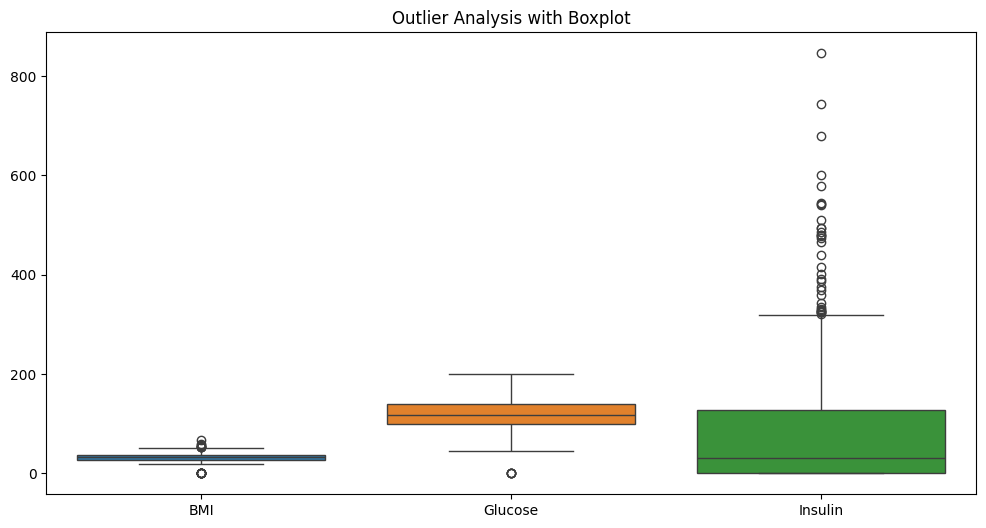

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["BMI", "Glucose", "Insulin"]])
plt.title("Outlier Analysis with Boxplot")
plt.show()

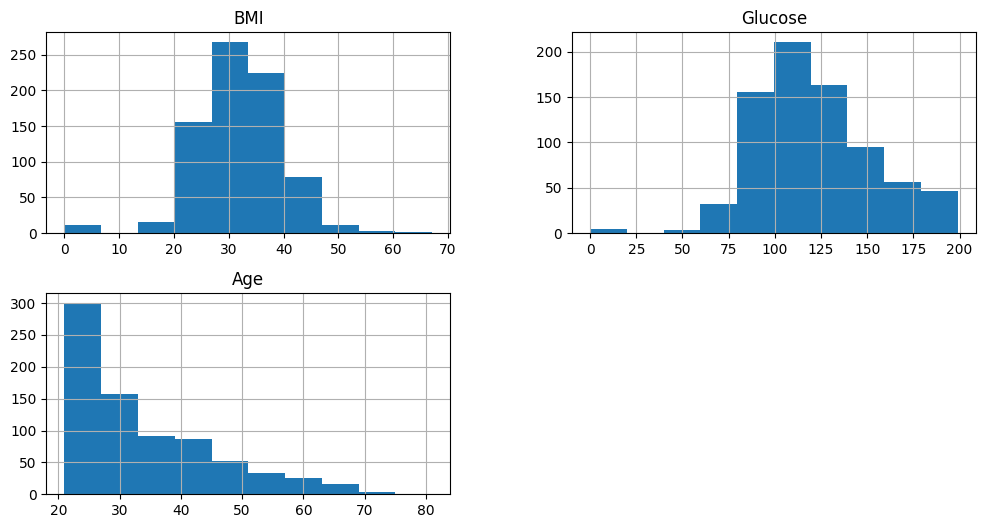

In [12]:
df[["BMI", "Glucose", "Age"]].hist(figsize=(12,6))
plt.show()

Outcome değişkeni ile Glucose ve BMI arasında pozitif bir ilişki olduğu gözlemlenmektedir.

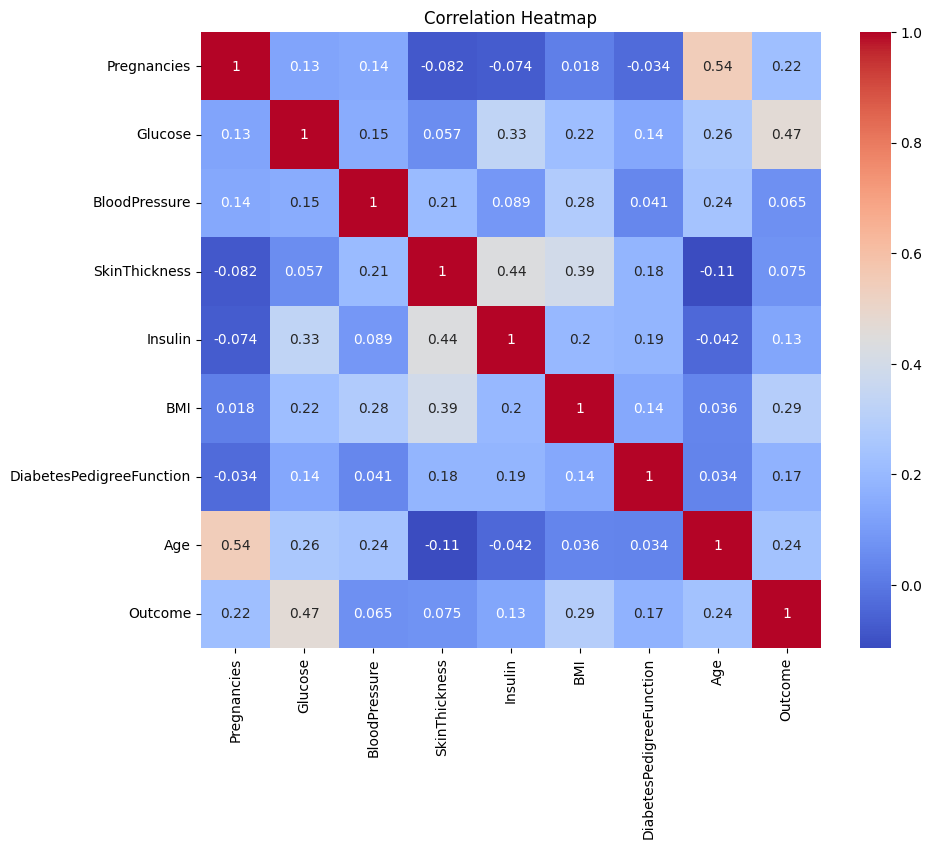

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

###1.3 Linear regression

In [14]:
X = df[["BMI"]]
y = df["Glucose"]

lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_pred = lin_reg.predict(X)

r2 = lin_reg.score(X, y)
r2

0.04887241775173856

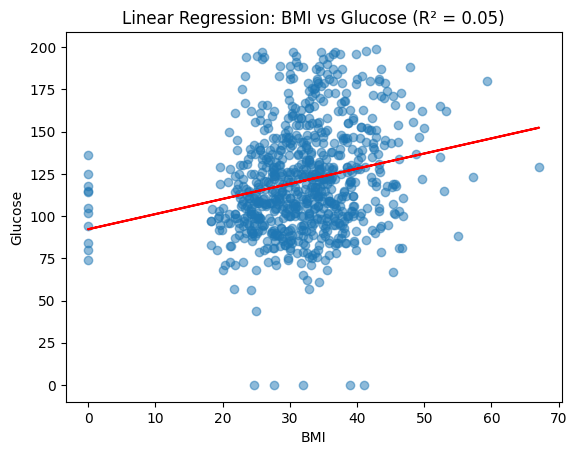

In [15]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_pred, color="red")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.title(f"Linear Regression: BMI vs Glucose (R² = {r2:.2f})")
plt.show()

Linear regresyon analizi, BMI ile Glucose seviyesi arasında zayıf/orta düzeyde bir doğrusal ilişki olduğunu göstermektedir. R² değeri, BMI değişkeninin Glucose üzerindeki açıklayıcılığının sınırlı olduğunu ortaya koymaktadır. Bu analiz, tahminleme amacıyla değil değişkenler arasındaki ilişkiyi incelemek amacıyla yapılmıştır.

## **2. Bölüm: Sınıflandırma (Classification) Modelleri ve Kıyaslama**

###2.1 Logistic Regression

In [16]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)

In [19]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



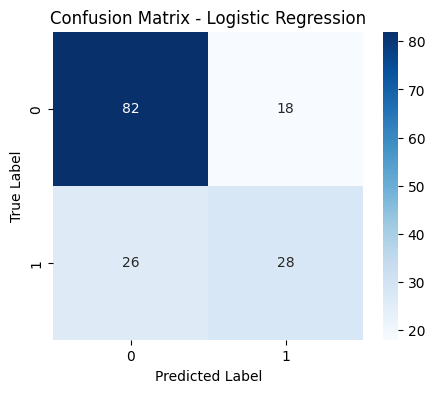

In [27]:
plot_confusion_matrix(
    y_test,
    y_pred_log,
    "Confusion Matrix - Logistic Regression"
)

### 2.2 KNN

In [20]:
accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred_knn))

best_k = np.argmax(accuracies) + 1
best_k

np.int64(12)

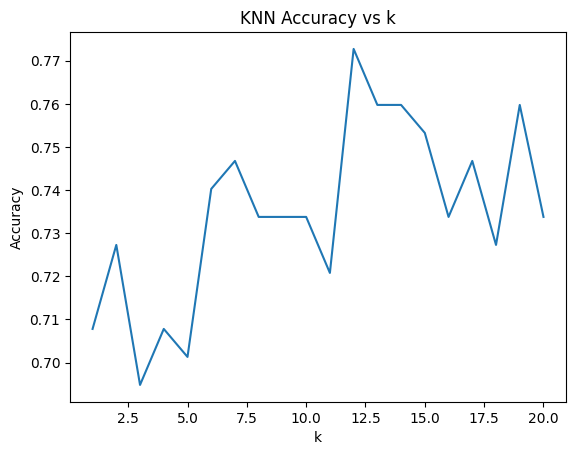

In [21]:
plt.plot(range(1,21), accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.show()

In [28]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

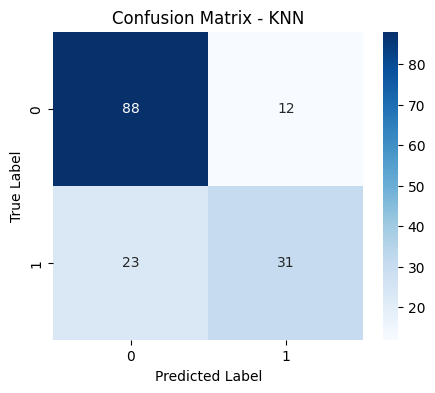

In [29]:
plot_confusion_matrix(
    y_test,
    y_pred_knn,
    "Confusion Matrix - KNN"
)

### 2.3 SVM

In [23]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

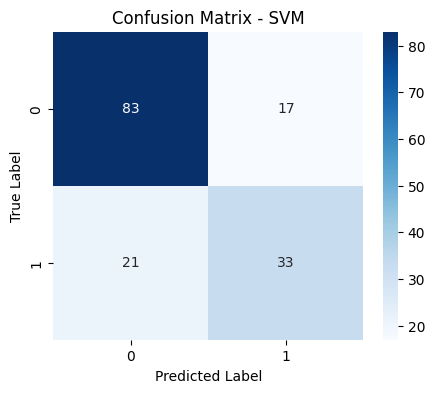

In [30]:
plot_confusion_matrix(
    y_test,
    y_pred_svm,
    "Confusion Matrix - SVM"
)

### 2.4 Decision tree

In [24]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

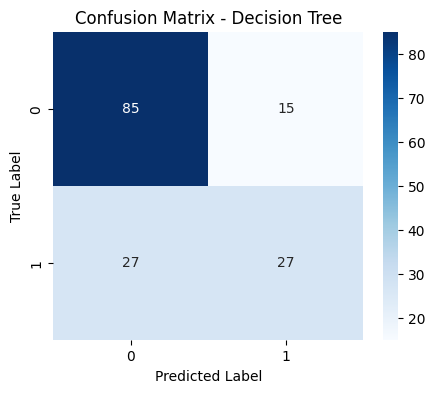

In [31]:
plot_confusion_matrix(
    y_test,
    y_pred_dt,
    "Confusion Matrix - Decision Tree"
)

### 2.5 Model Comparision

In [25]:
models = {
    "Logistic Regression": y_pred_log,
    "KNN": y_pred_knn,
    "SVM": y_pred_svm,
    "Decision Tree": y_pred_dt
}

results = []

for model, preds in models.items():
    results.append({
        "Model": model,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1-Score": f1_score(y_test, preds)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.714286,0.608696,0.518519,0.560000
1,KNN,0.772727,0.720930,0.574074,0.639175
2,SVM,0.753247,0.660000,0.611111,0.634615
3,Decision Tree,0.727273,0.642857,0.500000,0.562500


In [26]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

Confusion Matrix sonuçları incelendiğinde, modellerin True Positive ve True Negative değerlerinde farklı performanslar sergilediği görülmektedir. Özellikle False Negative değerlerinin yüksek olması, diyabet hastalarının yanlışlıkla sağlıklı olarak sınıflandırılması anlamına geldiği için sağlık uygulamalarında kritik bir risk oluşturmaktadır. Bu nedenle modeller yalnızca accuracy metriğine göre değil, precision ve recall değerleri birlikte değerlendirilerek karşılaştırılmıştır.

**Final** \
Bu çalışmada EDA ve linear regresyon ile veri setinin temel özellikleri incelenmiş, ardından farklı sınıflandırma modelleri karşılaştırılmıştır. Sonuçlar, tek bir metrik yerine accuracy, precision, recall ve F1-score’un birlikte değerlendirilmesinin daha sağlıklı sonuçlar verdiğini göstermektedir.